#  LAB 1 Web scrape Pop Vortex

In [1]:
# 1. import libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
# 2. url: we start with the 'second' page. Show that you can start whenever you want
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [4]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# 4.2. check that the html code looks like it should
# soup

In [6]:
#4.3. Paste the Selector from the first movie title copied from Chrome Dev Tools

# soup.select("body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper")

In [7]:
# soup.select("cite.title")

In [8]:
soup.select("cite.title")[0].get_text()

'Flowers'

In [9]:
soup.select("em.artist")[0].get_text()

'Miley Cyrus'

In [10]:
artlist = soup.select("em.artist")

In [11]:
# artlist


In [12]:
#initialize empty lists
top= []
title = []
artist= []


# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set
# (this is equivalent but more robust than just explicitly defining 250 iterations)
num_iter = len(soup.select("cite.title"))

tClist = soup.select("cite.title")
position = soup.select("p.chart-position")
artlist = soup.select("em.artist")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    top.append(position[i].get_text())
    title.append(tClist[i].get_text())
    artist.append(artlist[i].get_text())

print(top)    
print(title)
print(artist)



['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
['Flowers', 'Shakira: Bzrp Music Sessions, Vol. 53', 'VIBE (feat. Jimin of BTS)', 'Unholy', 'Anti-Hero', 'Made You Look', 'Heart Like A Truck', 'Thought You Should Know', 'Son Of A Sinner', 'wait in the truck', 'Journey', "I Ain't Worried", 'Lift Me Up (From Black Panther: Wakanda Forever - Music From and Inspired By)', "I'm Good (Blue)", 'Thank God', 'NEED A FAVOR', 'Unstoppable', 'Fall In Love', 'This 

In [13]:

top100songs = pd.DataFrame({"Top":top,"Song Title":title, "Artist":artist                   
                      })

In [14]:
top100songs

,Top,Song Title,Artist
0,1,Flowers,Miley Cyrus
1,2,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira
2,3,VIBE (feat. Jimin of BTS),TAEYANG
3,4,Unholy,Sam Smith & Kim Petras
4,5,Anti-Hero,Taylor Swift
...,...,...,...
95,96,Until I Found You (Em Beihold Version),Stephen Sanchez & Em Beihold
96,97,Monotonía,Shakira & Ozuna
97,98,Easier Said with Rum,Old Dominion
98,99,Thunderstruck,AC/DC


#  LAB 2 Web scrape Pop Vortex

In [ ]:
import random
col_one_list = top100songs['Song Title'].tolist()

song_name = input("Enter the name of the song you are looking for: ")



if song_name in col_one_list:
    
    col_one_list.remove(song_name) 
    
    print(" We recommend you listen to", random.choice(col_one_list))
else:
     print (" We can't give a recommendation at the moment")


# LAB 3 

 what to include in our database title artist id audio features 
 
 defend code with except
 
 save states every x extractions

#### autenthication

In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

##### storing secrets

In [ ]:
secrets_file = open("secrets.txt","r")

In [ ]:
string = secrets_file.read()

In [ ]:
# string


In [ ]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

#### authentication with secrets

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

#### Extracting large playlist

In [ ]:
playlist = sp.user_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")

In [23]:
playlist["total"] 

5295

In [24]:
# getting the playlist
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
#         instead of append we use + operator, so we're adding that up
        sleep(randint(1,3))
    return tracks

In [25]:
all_tracks = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")
len(all_tracks)

5295

In [26]:
# transforming list in dataframe
Mylist= pd.DataFrame(all_tracks)

In [27]:
Mylist

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2017-06-09T17:34:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
1,2017-06-29T20:42:16Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
2,2018-07-19T15:34:54Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
3,2016-07-05T18:32:51Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2016-07-05T18:39:38Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
...,...,...,...,...,...,...
5290,2021-06-16T11:00:52Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
5291,2021-06-16T11:00:59Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
5292,2021-06-16T11:01:04Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
5293,2021-06-16T11:01:10Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


flatten columns. Column track contains all the info I need

In [28]:

def flatten(Mylist, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(Mylist[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        Mylist = pd.concat([Mylist, flattened], axis=1)
        Mylist = Mylist.drop(column, axis=1)
    return Mylist

In [29]:
nested_columns= ['track']

In [30]:
flat = flatten(Mylist, nested_columns)
flat.head(2)

,added_at,added_by,is_local,primary_color,video_thumbnail,track_album,track_artists,track_available_markets,track_disc_number,track_duration_ms,...,track_href,track_id,track_is_local,track_name,track_popularity,track_preview_url,track_track,track_track_number,track_type,track_uri
0,2017-06-09T17:34:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,{'url': None},"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],1,241688,...,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,7dS5EaCoMnN7DzlpT6aRn2,False,Take Me To Church,0,None,True,1,track,spotify:track:7dS5EaCoMnN7DzlpT6aRn2
1,2017-06-29T20:42:16Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,{'url': None},"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,213293,...,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,2V4bv1fNWfTcyRJKmej6Sj,False,Cooler Than Me - Single Mix,77,https://p.scdn.co/mp3-preview/bf16e71252fdb6ef...,True,4,track,spotify:track:2V4bv1fNWfTcyRJKmej6Sj


In [31]:
flat.keys()

Index(['added_at', 'added_by', 'is_local', 'primary_color', 'video_thumbnail',
       'track_album', 'track_artists', 'track_available_markets',
       'track_disc_number', 'track_duration_ms', 'track_episode',
       'track_explicit', 'track_external_ids', 'track_external_urls',
       'track_href', 'track_id', 'track_is_local', 'track_name',
       'track_popularity', 'track_preview_url', 'track_track',
       'track_track_number', 'track_type', 'track_uri'],
      dtype='object')

In [32]:
flat1= flat[['track_id','track_name','track_uri','track_album']]

In [33]:
flat1.head(2)

,track_id,track_name,track_uri,track_album
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,"{'album_type': 'album', 'artists': [{'external..."
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,"{'album_type': 'album', 'artists': [{'external..."


In [34]:
# flattening track_album, which contains the data we want to extract

def flatten(flat1, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(flat1[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        Mylist = pd.concat([flat1, flattened], axis=1)
        Mylist = Mylist.drop(column, axis=1)
    return Mylist

In [35]:
nested_columns1= ['track_album']

In [36]:
flat = flatten(Mylist, nested_columns)
flat.head(2)

,added_at,added_by,is_local,primary_color,video_thumbnail,track_album,track_artists,track_available_markets,track_disc_number,track_duration_ms,...,track_href,track_id,track_is_local,track_name,track_popularity,track_preview_url,track_track,track_track_number,track_type,track_uri
0,2017-06-09T17:34:13Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,{'url': None},"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],1,241688,...,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,7dS5EaCoMnN7DzlpT6aRn2,False,Take Me To Church,0,None,True,1,track,spotify:track:7dS5EaCoMnN7DzlpT6aRn2
1,2017-06-29T20:42:16Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,{'url': None},"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,213293,...,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,2V4bv1fNWfTcyRJKmej6Sj,False,Cooler Than Me - Single Mix,77,https://p.scdn.co/mp3-preview/bf16e71252fdb6ef...,True,4,track,spotify:track:2V4bv1fNWfTcyRJKmej6Sj


In [37]:
flat.keys()

Index(['added_at', 'added_by', 'is_local', 'primary_color', 'video_thumbnail',
       'track_album', 'track_artists', 'track_available_markets',
       'track_disc_number', 'track_duration_ms', 'track_episode',
       'track_explicit', 'track_external_ids', 'track_external_urls',
       'track_href', 'track_id', 'track_is_local', 'track_name',
       'track_popularity', 'track_preview_url', 'track_track',
       'track_track_number', 'track_type', 'track_uri'],
      dtype='object')

### Track id gives us the audio features

In [38]:
sp.audio_features('7dS5EaCoMnN7DzlpT6aRn2')

[{'danceability': 0.566,
  'energy': 0.664,
  'key': 4,
  'loudness': -5.303,
  'mode': 0,
  'speechiness': 0.0464,
  'acousticness': 0.634,
  'instrumentalness': 0,
  'liveness': 0.116,
  'valence': 0.437,
  'tempo': 128.945,
  'type': 'audio_features',
  'id': '7dS5EaCoMnN7DzlpT6aRn2',
  'uri': 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
  'track_href': 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2',
  'duration_ms': 241688,
  'time_signature': 4}]

In [39]:
import warnings
warnings.filterwarnings("ignore")
# create an empty dataframe with columns for artist and song
   
df = pd.DataFrame(columns=['artist','song', 'uri', 'url'])
    
# Iterate over the all_tracks dictionary and insert the artist and song into the dataframe,
for track in all_tracks:
    artist_name = track['track']['artists'][0]['name']
    song_name = track['track']['name']
    uri = track["track"]["uri"]
    url = track["track"]["external_urls"]
    df = df.append({'artist':artist_name,'song':song_name, 'uri':uri}, ignore_index=True)


In [40]:
df.head(3)

,artist,song,uri,url
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,NaN
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,NaN
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,NaN


#### creating audio function to apply the result in the uri column

In [41]:
def audio_features(uri):
    
    return sp.audio_features(uri)


In [42]:
df['uri']= df['uri'].apply(audio_features)


In [43]:
# song_name = []
# artist_name = []
# track_uri = []
# for i in range(len(all_tracks)):
#     try:
#         song = all_tracks[i]['track']['name']
#         artist = all_tracks[i]['track']['album']['artists'][0]['name']
#         uri = all_tracks[i]['track']['uri']
#         artist_name.append(artist)
#         song_name.append(song)
#         track_uri.append(uri)
#     except:
#         artist_name.append('NA')
#         song_name.append('NA')
#         track_uri.append('NA')

# playlist_df= pd.DataFrame({'song': song_name,'artist': artist_name,'uri': track_uri})


#### Final dataframe. Just need to flatten uri column

In [44]:
df

,artist,song,uri,url
0,Hozier,Take Me To Church,"[{'danceability': 0.566, 'energy': 0.664, 'key...",NaN
1,Mike Posner,Cooler Than Me - Single Mix,"[{'danceability': 0.768, 'energy': 0.82, 'key'...",NaN
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),"[{'danceability': 0.558, 'energy': 0.559, 'key...",NaN
3,Bastille,Pompeii,"[{'danceability': 0.679, 'energy': 0.715, 'key...",NaN
4,Shakira,Hips Don't Lie (feat. Wyclef Jean),"[{'danceability': 0.778, 'energy': 0.824, 'key...",NaN
...,...,...,...,...
5290,MARINA,Hermit the Frog,"[{'danceability': 0.609, 'energy': 0.679, 'key...",NaN
5291,Olivia Rodrigo,deja vu,"[{'danceability': 0.439, 'energy': 0.61, 'key'...",NaN
5292,BIA,WHOLE LOTTA MONEY,"[{'danceability': 0.897, 'energy': 0.371, 'key...",NaN
5293,Ashnikko,Slumber Party (feat. Princess Nokia),"[{'danceability': 0.964, 'energy': 0.398, 'key...",NaN


In [45]:
def flatten(flat1, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(df[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        Mylist = pd.concat([df, flattened], axis=1)
        Mylist = Mylist.drop(column, axis=1)
    return Mylist

In [46]:
nested_columns= ['uri']

In [47]:
flat1 = flatten(Mylist, nested_columns)
flat1.head(2)

,artist,song,url,uri_0
0,Hozier,Take Me To Church,NaN,"{'danceability': 0.566, 'energy': 0.664, 'key'..."
1,Mike Posner,Cooler Than Me - Single Mix,NaN,"{'danceability': 0.768, 'energy': 0.82, 'key':..."


In [48]:
flat2 = flat1['uri_0'].apply(pd.Series)

In [49]:
flat2.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.634,0.0,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.179,0.0,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4


#### concatenating both dataframes  

In [50]:
FinalList= pd.concat([flat1, flat2], axis=1) 


#### dropping some columns

In [51]:
Finalist= FinalList.drop(['uri_0','url','type','uri','track_href','analysis_url','time_signature'], axis=1)

In [52]:
Finalist.head(2)

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Hozier,Take Me To Church,0.566,0.664,4,-5.303,0,0.0464,0.634,0.0,0.116,0.437,128.945,7dS5EaCoMnN7DzlpT6aRn2,241688
1,Mike Posner,Cooler Than Me - Single Mix,0.768,0.820,7,-4.630,0,0.0474,0.179,0.0,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293


In [53]:
Finalist.to_csv('Finalist.csv')

# LAB 4 clustering the songs

importing necessary libraries

In [16]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [17]:
Finalist=pd.read_csv('Finalist.csv')

In [18]:
Finalist.head()

,Unnamed: 0,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,Hozier,Take Me To Church,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945,7dS5EaCoMnN7DzlpT6aRn2,241688
1,1,Mike Posner,Cooler Than Me - Single Mix,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293
2,2,"Tyler, The Creator",See You Again (feat. Kali Uchis),0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387
3,3,Bastille,Pompeii,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,3gbBpTdY8lnQwqxNCcf795,214148
4,4,Shakira,Hips Don't Lie (feat. Wyclef Jean),0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093


drop categoricals

In [19]:
X = Finalist.drop(columns=['artist', 'song', 'artist', 'id'], axis=1)
X.head(2)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,0.566,0.664,4,-5.303,0,0.0464,0.634,0.0,0.116,0.437,128.945,241688
1,1,0.768,0.820,7,-4.630,0,0.0474,0.179,0.0,0.689,0.625,129.965,213293


In [20]:
X.dtypes

Unnamed: 0            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

scale and normalise

In [21]:
X_prep = StandardScaler().fit_transform(X)
pd.DataFrame(X_prep,columns=X.columns).head()       

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.731724,-0.719357,-0.206910,-0.345358,0.310316,-1.103751,-0.577340,2.379587,-0.209723,-0.503536,-0.346727,0.254327,0.663305
1,-1.731070,0.767132,0.725937,0.480103,0.597311,-1.103751,-0.567002,0.119894,-0.209723,3.543587,0.477929,0.292715,0.002159
2,-1.730415,-0.778228,-0.834788,0.204949,-1.360903,0.906002,-0.065622,1.073434,-0.209662,-0.552978,0.455996,-1.642029,-0.764021
3,-1.729761,0.112194,0.098059,1.030411,-0.150239,0.906002,-0.636265,-0.394124,-0.209723,0.591235,0.241059,0.197497,0.022067
4,-1.729107,0.840721,0.749856,1.305564,0.059143,-1.103751,-0.326133,0.641361,-0.209723,1.537683,1.061329,-0.834138,0.113922


get optimal k

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

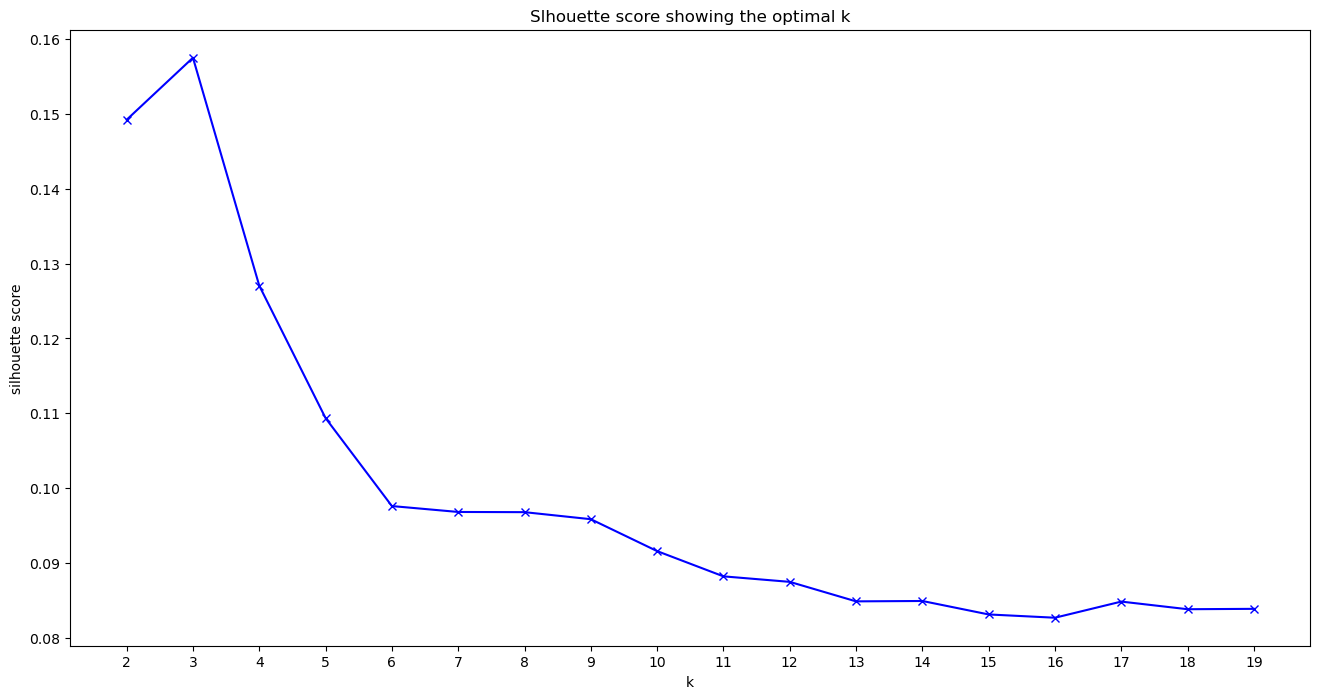

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

Visually makes sense to pick 3, but is like getting clustered all songs in only 3 musical genres, it's too wide.
So I choose 8, which gets a similar score with more clusters

Generate data base clusters with kmeans with my optimal cluster number (8)

In [24]:
kmeans = KMeans(n_clusters=8,
                    random_state=1234)
kmeans.fit(X_prep)


KMeans(random_state=1234)

In [25]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1186
1     682
2     371
3     144
4     785
5     641
6     362
7    1124
dtype: int64

In [27]:
data_cluster=Finalist.assign(clusters=clusters)
data_cluster

,Unnamed: 0,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,clusters
0,0,Hozier,Take Me To Church,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,7dS5EaCoMnN7DzlpT6aRn2,241688,4
1,1,Mike Posner,Cooler Than Me - Single Mix,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,2V4bv1fNWfTcyRJKmej6Sj,213293,2
2,2,"Tyler, The Creator",See You Again (feat. Kali Uchis),0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,7KA4W4McWYRpgf0fWsJZWB,180387,4
3,3,Bastille,Pompeii,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,3gbBpTdY8lnQwqxNCcf795,214148,0
4,4,Shakira,Hips Don't Lie (feat. Wyclef Jean),0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,5290,MARINA,Hermit the Frog,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,4Zcz6saEkOII3PlXd9gN3o,215960,0
5291,5291,Olivia Rodrigo,deja vu,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,61KpQadow081I2AsbeLcsb,215508,6
5292,5292,BIA,WHOLE LOTTA MONEY,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,5yorXJWdBan1Vlh116ZtQ7,156005,5
5293,5293,Ashnikko,Slumber Party (feat. Princess Nokia),0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,11ZulcYY4lowvcQm4oe3VJ,178405,5


In [28]:
data_cluster.to_csv('data_cluster.csv')